# Modelo de classificação Íris-Dataset

## Modelo de Aprendizado de Máquina que utiliza o _Perceptron_ e _Adaline-GD_.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

### Abrindo os dados e definindo as colunas 

In [2]:
colunas = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
dataset = pd.read_csv('Iris.csv',names=colunas)

### Análise dos dados

In [3]:
dataset.head() 

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_comprimento    150 non-null float64
sepal_largura        150 non-null float64
petal_comprimento    150 non-null float64
petal_largura        150 non-null float64
tipo                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


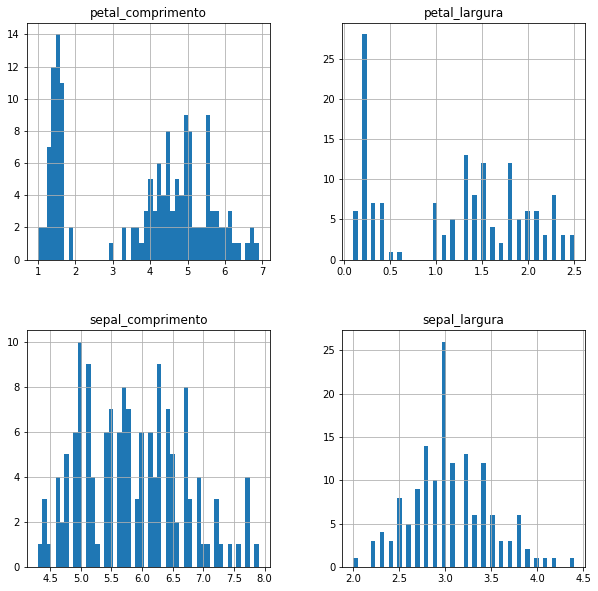

In [6]:
dataset.hist(bins=50, figsize=(10,10));

In [7]:
dataset['tipo'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: tipo, dtype: int64

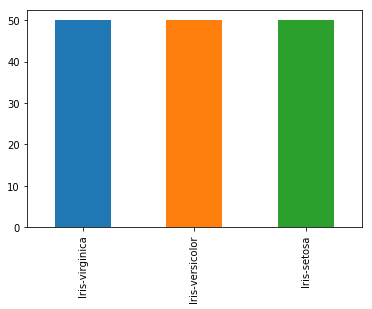

In [8]:
dataset['tipo'].value_counts().plot(kind='bar');

### Pegando somente as petalas do tipo setosa e virginica

In [9]:
dataset = dataset[ (dataset['tipo'] == 'Iris-setosa') | (dataset['tipo'] == 'Iris-virginica') ]

In [10]:
dataset['tipo'].value_counts()

Iris-virginica    50
Iris-setosa       50
Name: tipo, dtype: int64

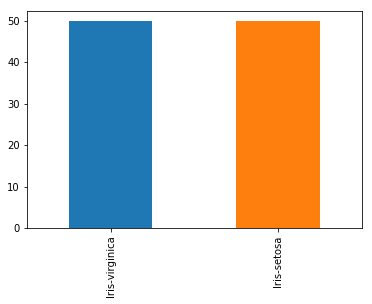

In [11]:
dataset['tipo'].value_counts().plot(kind='bar');

### Codificando labels para os valores 1 e -1

In [12]:
dataset['tipo'] = np.where(dataset['tipo'] == 'Iris-setosa', 1, -1)

### Separando features e labels

In [13]:
X = dataset.values[:,:-1]
Y = dataset.values[:,-1]

In [14]:
random = np.random.RandomState(13)
shuffled_indices = random.permutation(X.shape[0])
shuffled_indices

array([37, 62, 83, 14, 43,  9, 44, 31, 69, 57, 33, 87, 12, 91, 41, 23, 76,
       29, 50, 68,  3,  4, 90, 72, 20, 59, 93, 96, 89, 47, 39, 27, 42, 13,
        8, 88, 17, 84, 35, 95, 81,  0, 67, 55, 30, 36, 71, 61, 64, 10, 98,
       80, 38, 70, 15, 56, 92,  6, 53, 60,  7, 45, 65, 63, 78, 49, 51,  5,
       85, 34, 22, 94, 40, 79, 28, 24, 18,  1, 86, 11, 99, 21, 19, 32,  2,
       52, 75, 73, 97, 77, 54, 46, 66, 26, 58, 25, 16, 74, 48, 82])

In [15]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
Y[:5]

array([1., 1., 1., 1., 1.])

In [17]:
n = int(dataset.size*0.05)
X_train = X[:n]
Y_train = Y[:n]
X_test = X[n:]
Y_test = Y[n:]
n

25

### Verificando médias

In [18]:
np.average(X_train), np.average(Y_train)

(2.554, 1.0)

In [19]:
np.average(X_test), np.average(Y_test)

(3.6939999999999995, -0.3333333333333333)

### _Perceptron_

In [26]:
class Perceptron(object):
    def __init__(self, t_aprendizado = 0.0005, n_iter=50, rs=1):
        self.t_aprendizado = t_aprendizado
        self.n_iter = n_iter
        self.rs = rs
        
    def fit(self, X, Y):
        g_random = np.random.RandomState(self.rs)
        self.weight_ = g_random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for element, target in zip(X,Y):
                aux = self.t_aprendizado * (target - self.predict(element))
                self.weight_[1:] += aux * element
                self.weight_[0] += aux
                errors += int(aux != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X,self.weight_[1:]) + self.weight_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### AdalineGD

In [51]:
class AdalineGD(object):
    def __init__(self,eta=0.1, n_inter=50, rs=13):
        self.eta = eta
        self.n_inter = n_inter
        self.rs = rs
    
    def fit(self,X,Y):
        rd = np.random.RandomState(self.rs)
        self.weight_ = rd.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_inter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (Y - output)
            self.weight_[1:] += self.eta * X.T.dot(errors)
            self.weight_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.weight_[1:])+self.weight_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)
            

        

### Criação, treino e avaliação de modelos usando a métrica acurácia

In [69]:
model_p = Perceptron(t_aprendizado=0.00005, n_iter=50)
model_a = AdalineGD(eta=0.00005, n_inter=50)
model_p.fit(X_train,Y_train)
model_a.fit(X_train,Y_train)
y_pred_p = model_p.predict(X_test)
y_pred_a = model_a.predict(X_test)
acc_p = sum(y_pred_p == Y_test) / Y_test.shape[0]
acc_a = sum(y_pred_p == Y_test) / Y_test.shape[0]

### Resultados

In [70]:
print("Accurácia Perceptron: ",acc_p)
print("Accurácia AdalineGD: ",acc_a)

Accurácia Perceptron:  1.0
Accurácia AdalineGD:  1.0


In [71]:
model_p.errors_

[13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [72]:
model_a.cost_

[11.540397715534251,
 10.400099811264942,
 9.373229973871709,
 8.44850522649707,
 7.615764938546751,
 6.865859183066423,
 6.190548199492735,
 5.582411857098928,
 5.03476812434066,
 4.541599648262322,
 4.097487637235647,
 3.6975523205496192,
 3.337399330635672,
 3.0130714187886425,
 2.721004973847155,
 2.4579908660709147,
 2.221139185976628,
 2.007847490691143,
 1.8157722089202177,
 1.6428028903374052,
 1.4870390164513998,
 1.346769118155096,
 1.2204519705048922,
 1.106699658102889,
 1.0042623250083789,
 0.9120144416142364,
 0.8289424375918689,
 0.7541335650184307,
 0.6867658693169612,
 0.6260991578124883,
 0.5714668666687122,
 0.5222687368410801,
 0.47796421857134747,
 0.43806653195375467,
 0.40213731831171917,
 0.3697818236156214,
 0.34064456101821866,
 0.3144054048486339,
 0.2907760731466517,
 0.2694969600882262,
 0.250334283497643,
 0.23307751610386335,
 0.21753707231630506,
 0.20354222510288497,
 0.19093923008147817,
 0.17958963621274676,
 0.16936876453262895,
 0.16016433820915513,

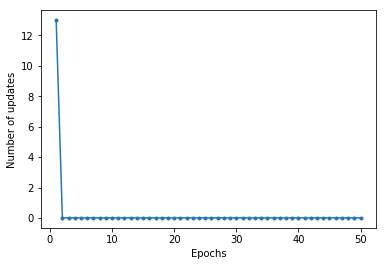

In [74]:
plt.plot(range(1, len(model_p.errors_)+1), model_p.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

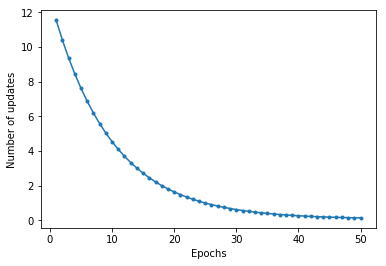

In [73]:
plt.plot(range(1, len(model_a.cost_)+1), model_a.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');